In [1]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt
import btseg.transformers as t

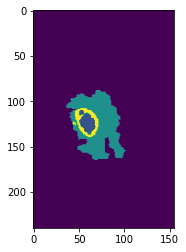

In [2]:
import nibabel as nib
image_volume = nib.load('../data/Training\\BraTS20_Training_001_seg.nii').get_fdata()
plt.imshow(image_volume[73,:,:])

In [14]:
img = image_volume[73,105:120,40:55]
img = np.squeeze(img)
# :, 140:150
fig_size = (12,12)

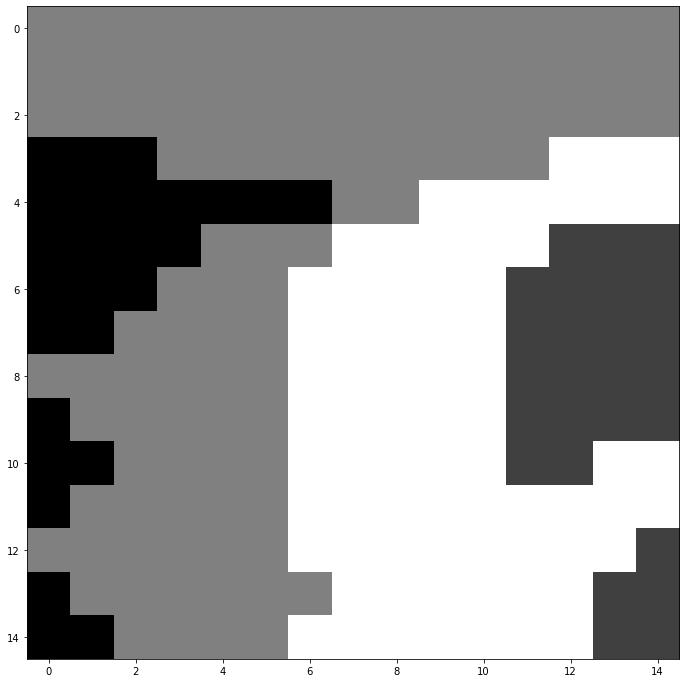

In [15]:
fig = plt.figure(figsize=fig_size) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
# ax.set_aspect('auto')

In [16]:
#     img = img.numpy()
width, height = img.shape
thresh = img.max() / 2.5
print(width, height, thresh)

15 15 1.6


In [53]:
for x in range(width):
    for y in range(height):
        val = np.round(img[x][y],2) if img[x][y] != 0 else 0
        ax.annotate(str(val), xy=(y, x), horizontalalignment='center', verticalalignment='center', color='red')

In [24]:
def show_image_in_details(img, fig_size = (12,12)):
    fig = plt.figure(figsize=fig_size) 
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    ax.set_aspect('auto')
#     img = img.numpy()
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            val = np.round(img[x][y], 0) if img[x][y] != 0 else 0
            color = 'white' if val == 0 or val == 2 or val == 1 else 'black'
            ax.annotate(str(int(val)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',                        
                        color=color)

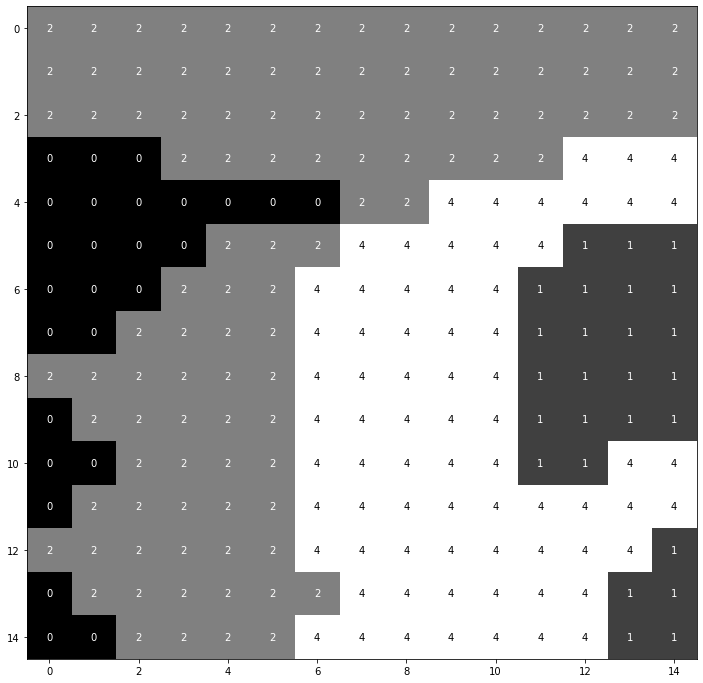

In [25]:
show_image_in_details(img)

In [10]:
transforms = t.Compose([
        t.ConvertColor(conversion_code=cv2.COLOR_BGR2GRAY),
        t.RegionSelection(region=3)
])

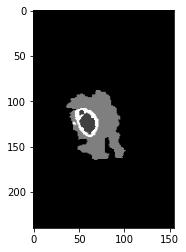

In [3]:
image = cv2.imread('../data/Outdir/BraTS20_Training_001/73.png')
plt.imshow(image)

In [4]:
np.unique(image)

array([  0,  64, 127, 255], dtype=uint8)

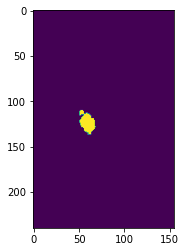

In [11]:
img_transformed = transforms(image)
plt.imshow(img_transformed)

## 3.2


In [15]:
transforms = t.Compose([
        t.ConvertColor(conversion_code=cv2.COLOR_BGR2GRAY),
        t.RegionSelection(region=1),
#         t.GaussianBlur(kernel_size=(7, 7), sigma_x=0)
])

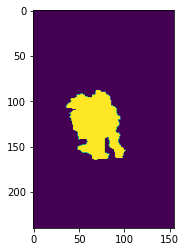

In [16]:
image_transformed = transforms(image)
plt.imshow(image_transformed)